In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import seaborn as sns

In [2]:
plt.style.use('seaborn-paper')
plt.rcParams['grid.linewidth']=0.01
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['legend.handlelength']=0.7
plt.rcParams['legend.handletextpad']=0.5
plt.rcParams['legend.frameon']=False
plt.rcParams['legend.framealpha']=0
plt.rcParams['figure.dpi']=100
plt.rcParams['errorbar.capsize']=2
plt.rcParams['lines.markeredgewidth']=1

In [258]:
experiment = "loss_dist_model[cnn4conv]_method[coteaching]_noise['pairflip']_NR[0.4]_IID[False]_ep300"

df = pd.read_csv("../save/lossdist/" + experiment + ".csv", index_col=0)
file_name = experiment + ".pdf"

50000

In [260]:
loss_col = 'loss'

noise_df = df[df['is_noise'] == 1]
clean_df = df[df['is_noise'] == 0]
print('# of pair noise samples: ', noise_df.shape)

l_n = noise_df[loss_col]
l_c = clean_df[loss_col]

# of pair noise samples:  (20000, 2)


In [262]:
def plot_dist(gs, clean, noise, value='loss', title='pair', bins=50, xlim=[-0.3, 10]):
    if title == 'pair':
        v_loc = 0
    else:
        v_loc = 1

    label = ['Clean', 'Noise']
    plt.subplot(gs[0, v_loc])
    weights = np.ones_like(clean)/float(len(clean))
    plt.hist(clean, histtype='stepfilled', bins=bins, alpha=0.7, label=label[0], edgecolor='w',
             facecolor='cornflowerblue', weights=weights)
    
    weights = np.ones_like(noise)/float(len(noise))
    plt.hist(noise, histtype='stepfilled', bins=bins, alpha=0.7, label=label[1], edgecolor='w', 
             facecolor='gray', weights=weights)
    plt.ylabel('Density')
    plt.xticks(visible=False)
    plt.legend(loc='best')
    plt.xlim(xlim)
    
    plt.subplot(gs[1, v_loc])
    boxdata = [noise, clean]
    color=['gray','cornflowerblue']
    bp = plt.boxplot(boxdata, vert=False, widths=0.6, patch_artist=True, sym='k+', notch=True)
    [ median.set(color='none', linewidth=1) for median in bp['medians'] ]
    [ flier.set(marker='', alpha=0.9, linewidth=0.1, color='gray') for flier in bp['fliers'] ]
    [ patch.set_facecolor(c) for patch, c in zip(bp['boxes'], color) ]
    plt.xlabel(value)
    plt.xlim(xlim)
    plt.yticks(range(1,3), ['Noise','Clean'] )


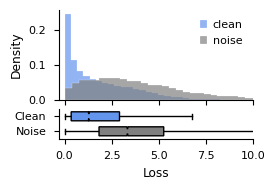

In [264]:
fig=plt.figure(figsize=(5, 2))
gs = gridspec.GridSpec(2,2,height_ratios=[6,2], width_ratios=[3,3])

plot_dist(gs, clean=l_c, noise=l_n, value='Loss', title='pair', bins=45, xlim=[-0.3, 10])

plt.tight_layout(h_pad=0.2, w_pad=1.5)

In [ ]:
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.05)